<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Machine Learning Introduction  

### Making a Variety of Machine Learning Models in Python 

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

### PGE 383 Exercise: Multiple Machine Learning Models for Subsurface Modeling in Python 

Here's a simple workflow, demonstration of training multiple machine learning models with the same dataset.  

* This is provided as a fast comparison of general behavoir of these models

* There is no effort to tune the hyperparameters / test the models with withheld testing data

* Given the 2 predictor features and 1 response feature it is easy to visualize the data and the model

This provides an opportunity to run and visualize a variety of machine learning models for experiential learning.

#### Machine Learning-based Prediction

Machine learning method for supervised learning for classification and regression analysis.  Here are some key aspects of $k$ nearest neighbours.

**Prediction**

* non-parametric method for regression and classification

* a function $\hat{f}$ of the nearest $k$ training data in predictor feature space such that we predict a response feature $Y$ from a set of predictor features $X_1,\ldots,X_m$. 

* the prediction is of the form $\hat{Y} = \hat{f}(X_1,\ldots,X_m)$ 

**Suppervised Learning**

* the response feature label, $Y$, is available over the training and testing data

#### The Machine Learning Models

This workflow includes the following models:

* linear regression
* k-nearest neighbor regression
* decision tree regression
* random forest regression
* tree-based gradient boosting regression

#### Objective 

In the PGE 383: Subsurface Machine Learning class I want to provide hands-on experience with building subsurface modeling workflows. Python provides an excellent vehicle to accomplish this. I have coded a package called GeostatsPy with GSLIB: Geostatistical Library (Deutsch and Journel, 1998) functionality that provides basic building blocks for building subsurface modeling workflows. 

The objective is to remove the hurdles of subsurface modeling workflow construction by providing building blocks and sufficient examples. This is not a coding class per se, but we need the ability to 'script' workflows working with numerical methods.    

#### Getting Started

Here's the steps to get setup in Python with the GeostatsPy package:

1. Install Anaconda 3 on your machine (https://www.anaconda.com/download/). 
2. From Anaconda Navigator (within Anaconda3 group), go to the environment tab, click on base (root) green arrow and open a terminal. 
3. In the terminal type: pip install geostatspy. 
4. Open Jupyter and in the top block get started by copy and pasting the code block below from this Jupyter Notebook to start using the geostatspy functionality. 

You will need to copy the data file to your working directory.  They are available here:

* Tabular data - unconv_MV.csv found [here](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV.csv).

There are exampled below with these functions. You can go here to see a list of the available functions, https://git.io/fh4eX, other example workflows and source code. 

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.


In [1]:
import os                                                   # to set current working directory 
import math                                                 # basic calculations like square root
from sklearn.neighbors import KNeighborsRegressor           # for nearest k neighbours
from sklearn import metrics                                 # measures to check our models
from sklearn.model_selection import cross_val_score         # cross validation methods
import pandas as pd                                         # DataFrames and plotting
import pandas.plotting as pd_plot
import numpy as np                                          # arrays and matrix math
import matplotlib.pyplot as plt                             # plotting
from subprocess import check_call
from sklearn.model_selection import train_test_split        # train and test split

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare functions

Let's define a couple of functions to streamline plotting correlation matrices and visualization of a decision tree regression model. 

In [2]:
def visualize_model(model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,legend=True):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.clip(Z,z_min,z_max)
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = plt.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
    plt.title(title)
    plt.xlabel(xfeature.name)
    plt.ylabel(yfeature.name)
    if legend == True:
      cbar = plt.colorbar(im, orientation = 'vertical')
      cbar.set_label(response.name, rotation=270, labelpad=20)
        
def visualize_model_sub(ax,model,xfeature,x_min,x_max,yfeature,y_min,y_max,response,z_min,z_max,title,legend=True):# plots the data points and the decision tree prediction 
    n_classes = 10
    cmap = plt.cm.RdYlBu
    plot_step = 0.02
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.clip(Z,z_min,z_max)
    Z = Z.reshape(xx.shape)
    cs = ax.contourf(xx, yy, Z, cmap=cmap,vmin=z_min, vmax=z_max, levels=np.linspace(z_min, z_max, 100))

    im = ax.scatter(xfeature,yfeature,s=None, c=response, marker=None, cmap=cmap, norm=None, vmin=z_min, vmax=z_max, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
    ax.set_title(title)
    ax.set_xlabel(xfeature.name)
    ax.set_ylabel(yfeature.name)
    ax.set_xlim(x_min,x_max)
    ax.set_ylim(y_min,y_max)
    if legend == True:
      cbar = plt.colorbar(im, orientation = 'vertical')
      cbar.set_label(response.name, rotation=270, labelpad=20)

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time).


In [3]:
os.chdir("c:/PGE383")                                       # set the working directory

You will have to update the part in quotes with your own working directory and the format is different on a Mac (e.g. "~/PGE").  

#### Read the data table

First copy the "unconv_MV.csv" comma delimited file from https://github.com/GeostatsGuy/GeoDataSets to your working directory, then run this command to read the file into a DataFrame object (part of Pandas package).  

In [4]:
my_data = pd.read_csv("unconv_MV.csv")                      # load the comma delimited data file

Let's visualize the first several rows of our data stored in a DataFrame so we can make sure we successfully loaded the data file.

In [5]:
my_data[:7]                                                 # preview the first 7 rows of the dataframe

,WellIndex,Por,LogPerm,AI,Brittle,TOC,VR,Production
0,1,15.91,1.67,3.06,14.05,1.36,1.85,177.381958
1,2,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778
2,3,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583
3,4,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629
4,5,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919
5,6,19.47,2.04,2.73,54.37,1.42,2.12,5497.005506
6,7,12.70,1.30,3.70,43.03,0.45,1.95,1784.266285


Let's remove the well index and check the summary summary statistics.

In [6]:
my_data = my_data.iloc[:,1:8]                               # copy all rows and columns 1 through 8, note 0 column is removed
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.719480,15.077006,-10.500000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.003810,0.504978,-0.260000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


It is good that we checked the summary statistics, because we have some negative values for brittleness and total organic carbon. The is physically imposible.  The values must be in error. We know the lowest possible values are 0.0, so we will truncate on 0.0.  We use the *get_numerical_data()* DataFrame member function to get a shallow copy of the data from the DataFrame.  Since it is a shallow copy, any changes we make to the copy are made to the data in the original DataFrame.  This allows us to apply this simple conditional statement to all the data values in the DataFrame all at once.

In [7]:
num = my_data._get_numeric_data()                           # get the numerical values
num[num < 0] = 0                                            # truncate negative values to 0.0
my_data.describe().transpose()                              # calculate summary statistics for the data

,count,mean,std,min,25%,50%,75%,max
Por,1000.0,14.950460,3.029634,5.400000,12.85750,14.98500,17.080000,24.65000
LogPerm,1000.0,1.398880,0.405966,0.120000,1.13000,1.39000,1.680000,2.58000
AI,1000.0,2.982610,0.577629,0.960000,2.57750,3.01000,3.360000,4.70000
Brittle,1000.0,49.731480,15.033593,0.000000,39.72250,49.68000,59.170000,93.47000
TOC,1000.0,1.006170,0.499838,0.000000,0.64000,0.99500,1.360000,2.71000
VR,1000.0,1.991170,0.308194,0.900000,1.81000,2.00000,2.172500,2.90000
Production,1000.0,2247.295809,1464.256312,2.713535,1191.36956,1976.48782,3023.594214,12568.64413


#### Standardizing Predictor Features

The k-nearest neighbour etc. method uses a nearest training sample search in feature space (like k-means clustering). To remove the impact feature range from the approach we standardize the features.

* we will standardize our predictor features to have a mean of zero and a variance of one.

* we use the scikikt learn preprocessing to simplify this step and provid a reverse transform.

In [8]:
from sklearn.preprocessing import StandardScaler

transform = StandardScaler(); 

features = ['Por','Brittle']

my_data['sPor'] = transform.fit_transform(my_data.loc[:,features].values)[:,0] # standardize the data features to mean = 0, var = 1.0
my_data['sBrittle'] = transform.fit_transform(my_data.loc[:,features].values)[:,1] # standardize the data features to mean = 0, var = 1.0
my_data.head()

,Por,LogPerm,AI,Brittle,TOC,VR,Production,sPor,sBrittle
0,15.91,1.67,3.06,14.05,1.36,1.85,177.381958,0.316877,-2.374638
1,15.34,1.65,2.60,31.88,1.37,1.79,1479.767778,0.128641,-1.188034
2,20.45,2.02,3.13,63.67,1.79,2.53,4421.221583,1.816157,0.927622
3,11.95,1.14,3.90,58.81,0.40,2.03,1488.317629,-0.990866,0.604184
4,19.53,1.83,2.57,43.75,1.40,2.11,5261.094919,1.512338,-0.398073


Let's demonstrate the reverse transform from standarized back to the original units.

* we won't need this in our workflow since the we only need to forward transform the predictor features to train the model and make predictions

In [9]:
invfeatures = ['sPor','sBrittle']
transform.inverse_transform(my_data.loc[:,invfeatures])

array([[15.91, 14.05],
       [15.34, 31.88],
       [20.45, 63.67],
       ...,
       [15.55, 58.25],
       [20.89, 46.17],
       [15.74, 73.08]])

We can compare the output above with the original porosity and brittleness. The reverse transform works! We will use it to return to the original feature units.

#### Feature Ranges

Let's set some ranges for plotting. Note for the standardized predictor features we will use -3.5 to 3.5 as the limits.

In [10]:
pormin = 5.0; pormax = 25.0                                 # set minumums and maximums for visualization 
brittlemin = 0.0; brittlemax = 100.0
prodmin = 0.0; prodmax = 13000.0

This dataset has variables from 1,000 unconventional wells including well average porosity, log transform of permeability (to linearize the relationships with other variables), accoustic impedance (kg/m2s*10^6), brittness ratio (%), total organic carbon (%), vitrinite reflectance (%), and initial production 90 day average (MCFPD).  Note, the dataset is synthetic.

#### Working with Only Two Predictor Features

Let's simplify the problem to 2 predictor features, Porosity and Brittleness to predict Production rate.  We will also reduce the number of wells from 1,000 to 500.  By working with only 2 features, it is very easy to visualize the segmentation of the feature space (it is only 2D and can be shown compleltely on a single plot).

In [11]:
my_data_subset = my_data.iloc[:,[7,8,6]]                    # extract just por, brittle and prod with 100 samples
X_train, X_test, y_train, y_test = train_test_split(my_data_subset.iloc[:,[0,1]], my_data_subset.iloc[:,2], test_size=0.25, random_state=73073)
y_train = pd.DataFrame({'Prod':y_train.values})
y_test = pd.DataFrame({'Prod':y_test.values})

Let's first check the univariate statistics of Porosity, Brittleness and Producton.

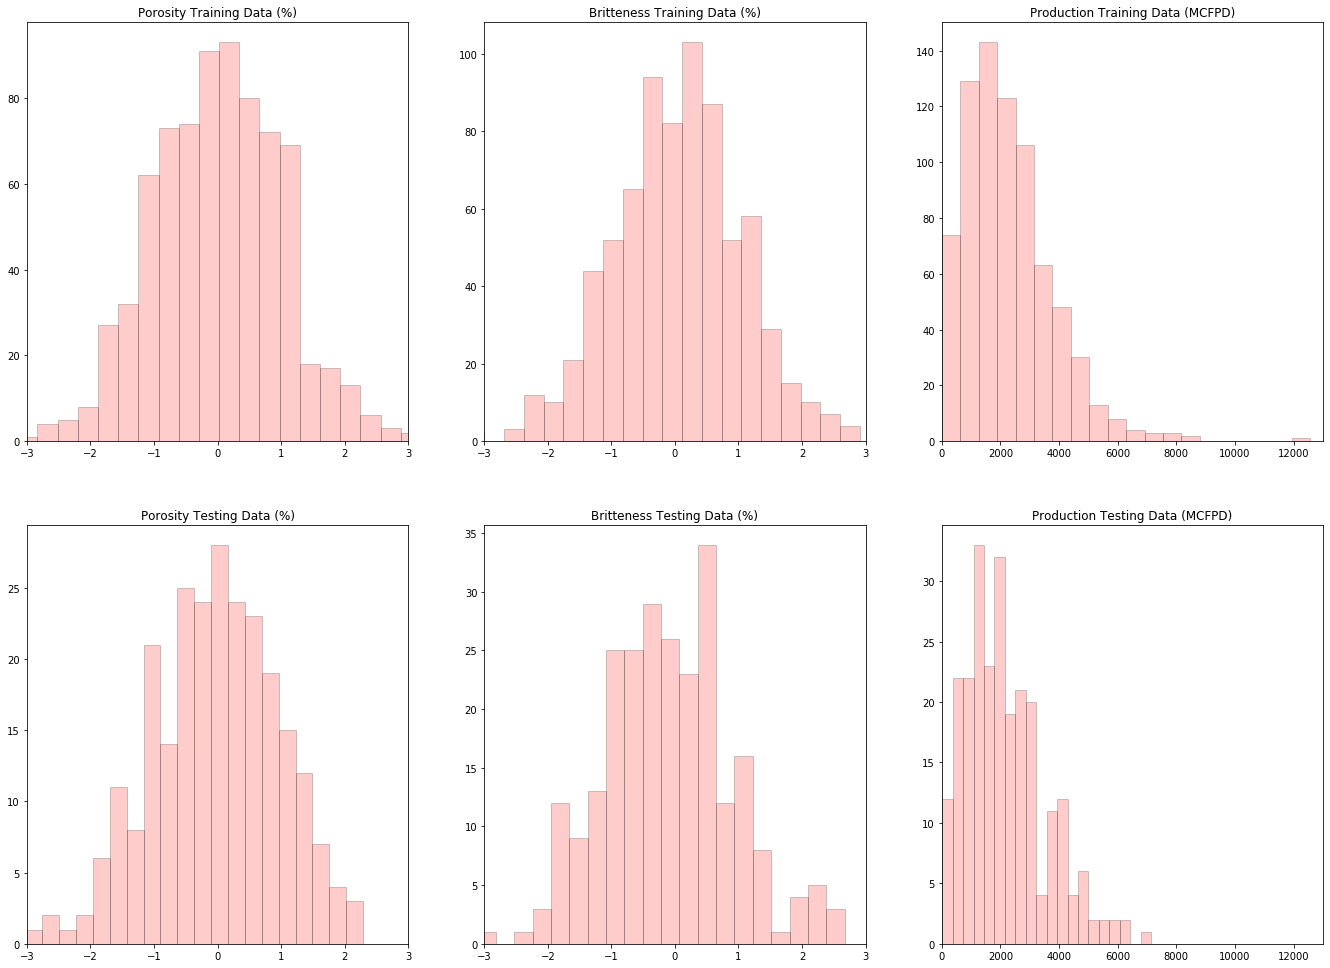

In [12]:
plt.subplot(231)
plt.hist(X_train["sPor"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Porosity Training Data (%)'); plt.xlim(-3,3)

plt.subplot(232)
plt.hist(X_train["sBrittle"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Britteness Training Data (%)'); plt.xlim(-3,3)

plt.subplot(233)
plt.hist(y_train['Prod'], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Production Training Data (MCFPD)'); plt.xlim(prodmin,prodmax)

plt.subplot(234)
plt.hist(X_test["sPor"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Porosity Testing Data (%)'); plt.xlim(-3,3)

plt.subplot(235)
plt.hist(X_test["sBrittle"], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Britteness Testing Data (%)'); plt.xlim(-3,3)

plt.subplot(236)
plt.hist(y_test['Prod'], alpha = 0.2, color = 'red', edgecolor = 'black', bins=20)
plt.title('Production Testing Data (MCFPD)'); plt.xlim(prodmin,prodmax)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=3.2, wspace=0.2, hspace=0.2)
plt.show()

The distributions are well behaved, we cannot observe obvious gaps nor truncations.  Let's look at a scatter plot of Porosity vs. Brittleness with points colored by Production.

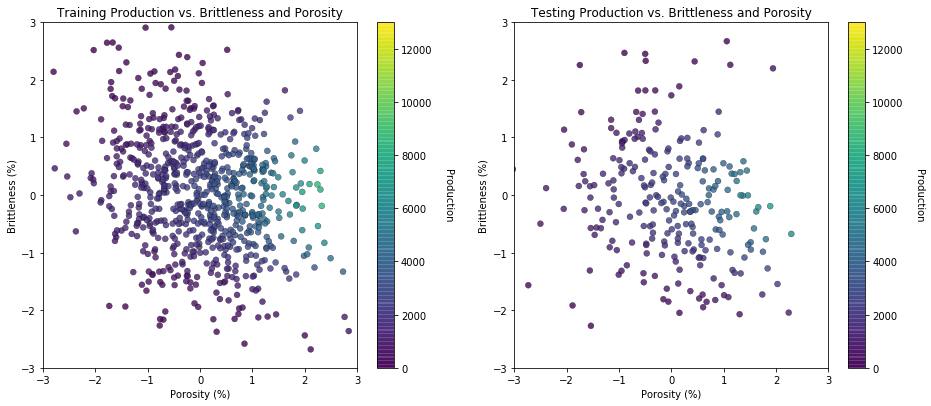

In [13]:
plt.subplot(121)
im = plt.scatter(X_train["sPor"],X_train["sBrittle"],s=None, c=y_train['Prod'], marker=None, cmap=None, norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Training Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplot(122)
im = plt.scatter(X_test["sPor"],X_test["sBrittle"],s=None, c=y_test['Prod'], marker=None, cmap=None, norm=None, vmin=prodmin, vmax=prodmax, alpha=0.8, linewidths=0.3, verts=None, edgecolors="black")
plt.title('Testing Production vs. Brittleness and Porosity'); plt.xlabel('Porosity (%)'); plt.ylabel('Brittleness (%)')
plt.xlim(-3,3); plt.ylim(-3,3)
cbar = plt.colorbar(im, orientation = 'vertical')
cbar.set_label("Production", rotation=270, labelpad=20)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

This problem looks complicated and could not be modeled with simple linear regression.  It appears there is a sweet spot for Brittleness and increasing Porosity is always beneficial for Production.

#### Instantiate, Fit and Predict with $k$ Nearest Neighbour

Let's instantiate, fit and predict with a $k$ nearest neighbour model.

* instantiate it with the hyperparameters, $k$ nearest neighbours 

* train with the training data, we use the standard fit function from scikit learn 


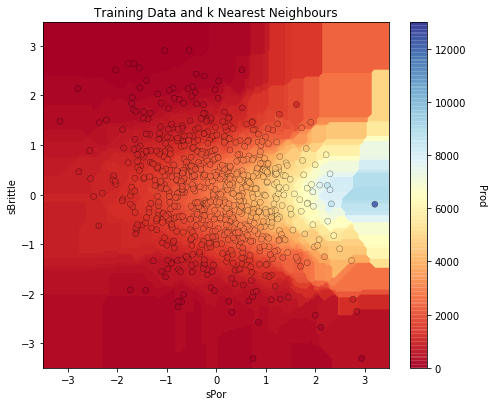

In [14]:
neigh = KNeighborsRegressor(weights = 'uniform', n_neighbors=5, p = 1) # instantiate the prediction model
neigh_fit = neigh.fit(X_train,y_train['Prod'])              # train the model with the training data

plt.subplot(111)
visualize_model(neigh_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and k Nearest Neighbours')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Instantiate, Fit and Predict with Linear Regression

Let's instantiate, fit and predict with a linear regression model.

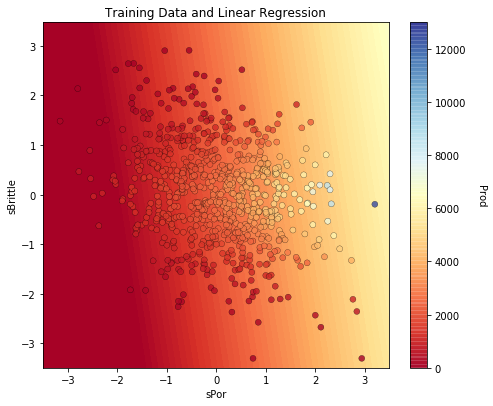

In [15]:
from sklearn.linear_model import LinearRegression

neigh = LinearRegression()                                   # instantiate the prediction model
linear_fit = neigh.fit(X_train,y_train['Prod'])              # train the model with the training data

plt.subplot(111)
visualize_model(linear_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and Linear Regression')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Instantiate, Fit and Predict with Decision Tree Regression

Let's instantiate, fit and predict with a decision tree regression model.

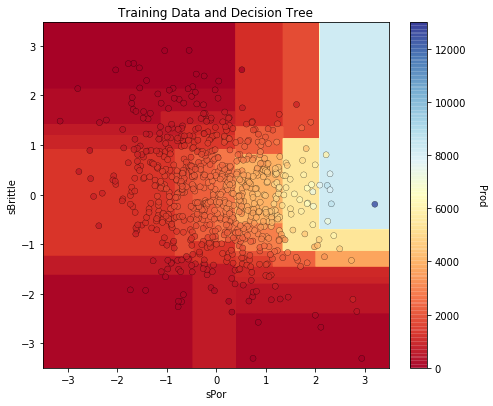

In [16]:
from sklearn import tree                                  # tree program from scikit learn (package for machine learning)

my_tree = tree.DecisionTreeRegressor(min_samples_leaf=2, max_depth = 5) # instantiate the prediction model
tree_fit = my_tree.fit(X_train,y_train['Prod'])           # train the model with the training data

plt.subplot(111)
visualize_model(tree_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and Decision Tree')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Instantiate, Fit and Predict with Tree-based Random Forest Regression

Let's instantiate, fit and predict with a random forest regression model.

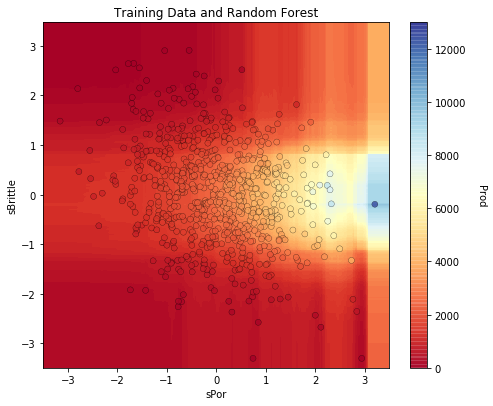

In [17]:
from sklearn.ensemble import RandomForestRegressor        # tree program from scikit learn (package for machine learning)

forest = RandomForestRegressor(max_depth=7, random_state=73073,n_estimators=1000, max_features=1)

forest_fit = forest.fit(X_train,y_train['Prod'])          # train the model with training data 

plt.subplot(111)
visualize_model(forest_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and Random Forest')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Instantiate, Fit and Predict with Tree-based Gradient Boosting Regression

Let's instantiate, fit and predict with a tree-based gradient boosting regression model.

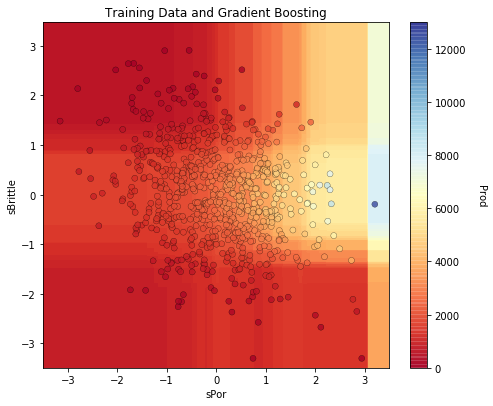

In [18]:
from sklearn.ensemble import GradientBoostingRegressor      # tree-based gradient boosting

params = {
    'loss': 'ls',                                           # L2 Norm - least squares
    'max_depth': 2,                                         # maximum depth of each tree
    'learning_rate': 0.003,                                 # constraint on magnitude of update with each estimator / for slow, robust learning
    'criterion': 'mse'                                      # tree construction criteria is mean square error over training
}

gb = GradientBoostingRegressor(n_estimators=1000,**params)  # instantiate the prediction model
gb_fit = gb.fit(X_train,y_train['Prod'])                    # train the model with the training data

plt.subplot(111)
visualize_model(gb_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and Gradient Boosting')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

#### Summary

Let's look at all the models together for a visual comparison.

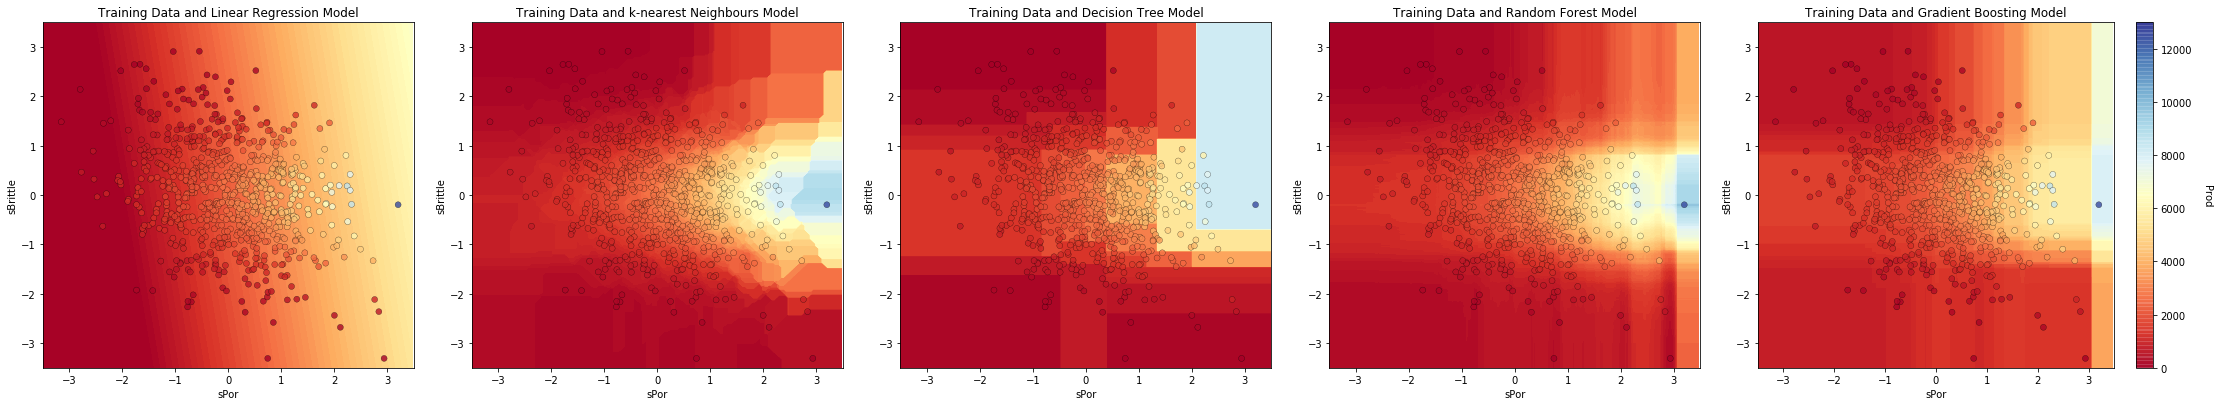

In [19]:
from matplotlib import gridspec
fig = plt.figure(constrained_layout=False)
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 1, 1, 1.2], figure=fig) 

visualize_model_sub(plt.subplot(gs[0]),linear_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and Linear Regression Model',legend=False)

visualize_model_sub(plt.subplot(gs[1]),neigh_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and k-nearest Neighbours Model',legend=False)

visualize_model_sub(plt.subplot(gs[2]),tree_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and Decision Tree Model',legend=False)

visualize_model_sub(plt.subplot(gs[3]),forest_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and Random Forest Model',legend=False)

visualize_model_sub(plt.subplot(gs[4]),gb_fit,X_train["sPor"],-3.5,3.5,X_train["sBrittle"],-3.5,3.5,y_train["Prod"],prodmin,prodmax,'Training Data and Gradient Boosting Model',legend=True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=5.0, top=1.2, wspace=0.15, hspace=0.1)

fig.savefig('Multiple_ML_Models.jpg',dpi = 400, bbox_inches = 'tight')

plt.show()

#### Comments

This is provided for an opportunity to try out a variety of machine learning models.

* no effort was made to tune hyperparameters / test the models with withheld testing data

* but, an opportunity to quickly try out a variety of machine learning models

I hope this was helpful,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin
On twitter I'm the @GeostatsGuy.


***

#### More on Michael Pyrcz and the Texas Center for Geostatistics:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)
